## 1. The Problem statement:

- This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

## 2. Data collection

- Variable Descriptions:


| Variable      | Description                                    	|
|-------------  |------------------------------------------------	|
| TV         	| Advertising budgets (in thousands of dollars)    	|
| radio         | Advertising budgets (in thousands of dollars)     |
| newspaper     | Advertising budgets (in thousands of dollars)     |
| sales         | Advertising data sales (in thousands of units)    |

- Rows: 200
- Source: [Kaggle- Advertising](https://www.kaggle.com/ashydv/advertising-dataset)
- Jupyter Notebook: [Github - Rajan-jangir](https://github.com/Rajan-jangir/Advertising-Prediction)

In [1]:
# importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression

In [2]:
# Reading the data file
data= pd.read_csv('Advertising.csv')

In [3]:
# checking the first five rows from the dataset
data.head() 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
data.shape

(200, 5)

In [5]:
# printing the summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# checking data types of each column
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

## 3. Exploratory data analysis

In [7]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# finding the count of missing values from different columns
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

So, there is no missing values.

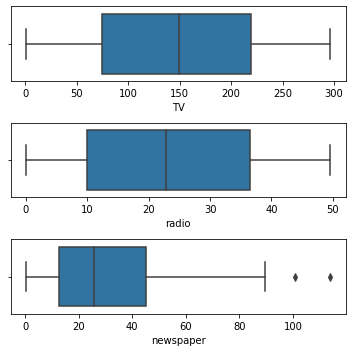

In [9]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['radio'], ax = axs[1])
plt3 = sns.boxplot(data['newspaper'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in TV and radio. But there is outliers in newspaper, so let's remove this!

In [10]:
# we are removing the top 2% data from the newspaper column
q = data['newspaper'].quantile(0.98)
data_cleaned = data[data['newspaper']<q]

Now, let's check again

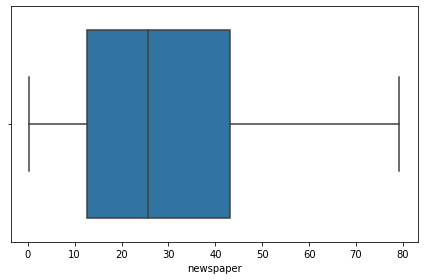

In [11]:
plt3 = sns.boxplot(data_cleaned['newspaper'])
plt.tight_layout()

Wohoo!, there is no outliers in newspaper now.

<function matplotlib.pyplot.show(*args, **kw)>

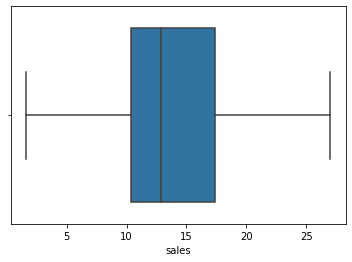

In [12]:
sns.boxplot(data['sales'])
plt.show

There is no outlier present in target Sales

In [13]:
df = data.drop(columns='Unnamed: 0')

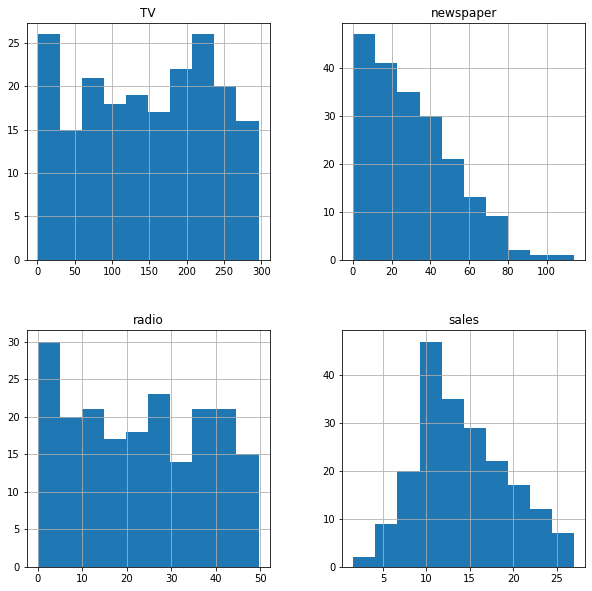

In [14]:
# to check all variables at once
df.hist( bins = 10, figsize = (10,10))
plt.show()

Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


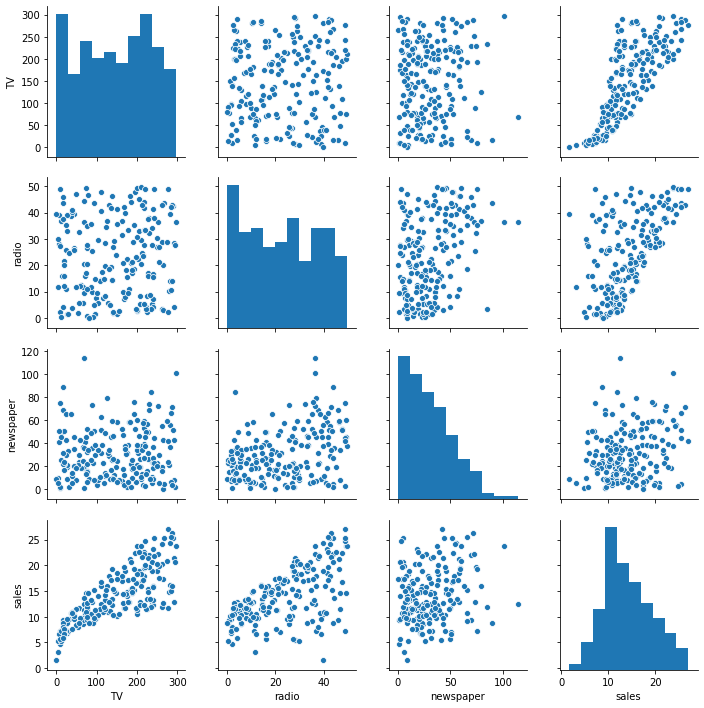

In [15]:
# pairplot
sns.pairplot(df, size=2.5)
plt.show()

- Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
- There is no correlation seems between all features.

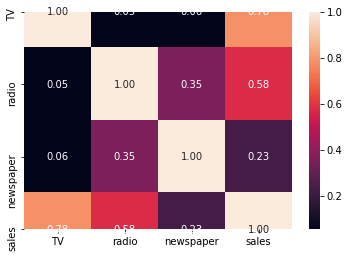

In [16]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

Now, let's showcase the relationship between the feature(TV,radio,newspaper) and target(sales) column

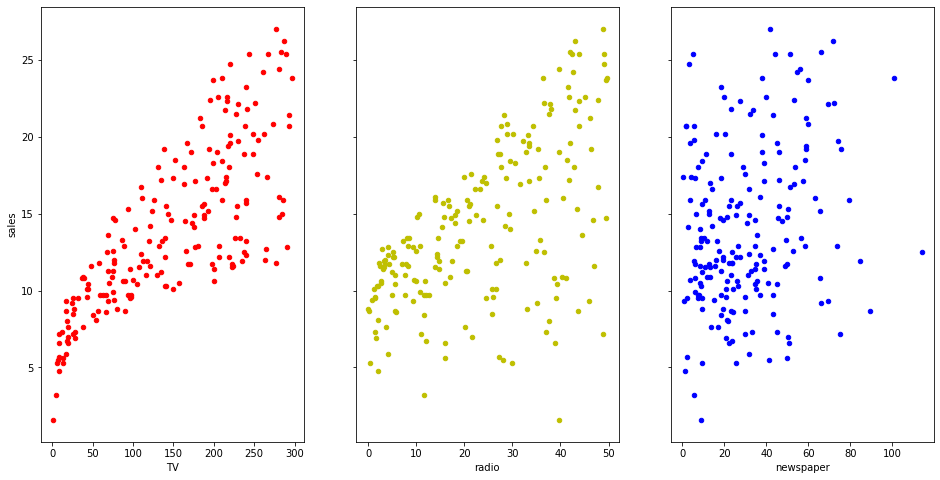

In [17]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)

data.plot(kind='scatter', x='TV', y='sales',c='r', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales',c='y', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales',c='b', ax=axs[2])

- From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad, Radio ad and the sales is almost a linear one.
- Hence, we can build a model using the Linear Regression Algorithm

## 4. Data preparation and Model building

- Let's create X and y for TV, radio, and newspaper

In [18]:
X = data[['TV', 'radio', 'newspaper']]
y = data[['sales']]

model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print(model.intercept_)
print(model.coef_)

[2.93888937]
[[ 0.04576465  0.18853002 -0.00103749]]


In [19]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [20]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


- Let's split the data into training and testing

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=300)

## 5.Model development and Evaluation

In [22]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.score(x_train,y_train)

0.8974046179234763

In [24]:
model.score(x_test,y_test)

0.8779684119036631

- So, the training accuracy of the model is 89.41% 
- And the testing accuracy is 87.79%